Stock prediction model using LSTM.

In [ ]:
#Updating the modules (otherwise error message in fetching dataset from yahoo)
!pip install --upgrade pandas

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

#2138 is training size
#549 is testing size

In [ ]:
#building dataframe for tata motors stock from yahoo finance
df = pd.read_csv('/content/TATAMOTORS.NS.csv')
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.head

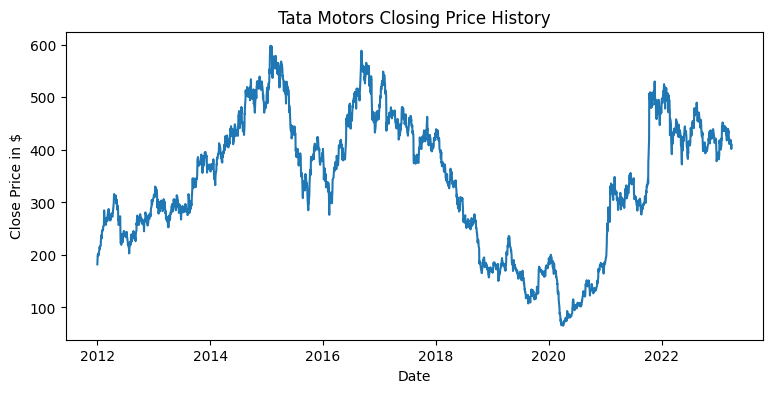

In [4]:
#Ploting tata stock price (Just for Fun)
plt.figure(figsize=(9,4))
plt.title("Tata Motors Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close Price in $')
plt.show()

In [ ]:
#Filtering only required column "Here we only considering Close stock price" From DataFrame
data = df.filter(['Close'])
data

In [6]:
#Converting data frame to NumPy array And calculating 80% data length for training data length
dataset = data.values
train_data_len = round(len(dataset) * 0.8)

In [7]:
#Scaling the training data between 0 to 1 for our LSTM model
train_data  = dataset[0:train_data_len,:] #Taking 80% of total dataset for training

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_train = scaler.fit_transform(train_data) #Scaling training data

In [8]:
#Appending the past 60s days closing values to x_train(Inputs) and appending 61th Closing value to y_train(Output)
x_train = [] #inputs past 60 days closing values
y_train = [] #output 61th day closing value
for i in range(60, train_data_len):
  x_train.append(scaled_data_train[i-60:i,0])
  y_train.append(scaled_data_train[i,0])

In [9]:
#Converting list to NumPy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(len(x_train),60,1)

In [10]:
#Building LSTM Model and layers
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape = (60, 1)))
#model.add(Dropout(0.5))
model.add(LSTM(31))
model.add(Dense(1))
#print(model.summary())

In [11]:
model = Sequential()
model.add(LSTM(60, input_shape = (60, 1)))
model.add(Dense(1))

In [ ]:
#Compling and Fit the model
model.compile(optimizer="Nadam", loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=1, epochs=5)

In [13]:
#Appending the past 60s days closing values to x_test(Test Inputs)
test_data = dataset[train_data_len - 60: , :]
test_data = scaler.fit_transform(test_data)
x_test = []
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

#Storing Actual Closing values to y_test
y_test = dataset[train_data_len:, :]

In [14]:
#Converting x_test to NumPy array and reshape it
x_test = np.array(x_test)
x_test = x_test.reshape(len(x_test),60,1)

In [ ]:
#Predicting the closing value till original dataset
pred = model.predict(x_test)
pred_inverse = scaler.inverse_transform(pred)

In [16]:
#Predicting Future 5 Days Values

#Predicting +1 Day from last day of dataset
x_test_59_1 = x_test[len(x_test)-1][1:60]
x_test_59_1 = np.append(x_test_59_1, [pred[len(pred)-1]], axis=0)
x_test_59_1 = x_test_59_1.reshape(1,60,1)
predp = model.predict(x_test_59_1)

#Predicting +2 Day from last day of dataset
x_test_59_2 = x_test_59_1[0][1:60]
x_test_59_2 = np.append(x_test_59_2, [predp[len(predp)-1]], axis=0)
x_test_59_2 = x_test_59_2.reshape(1,60,1)
predpp = model.predict(x_test_59_2)

#Predicting +3 Day from last day of dataset
x_test_59_3 = x_test_59_2[0][1:60]
x_test_59_3 = np.append(x_test_59_3, [predpp[len(predpp)-1]], axis=0)
x_test_59_3 = x_test_59_3.reshape(1,60,1)
predppp = model.predict(x_test_59_3)

#Predicting +4 Day from last day of dataset
x_test_59_4 = x_test_59_3[0][1:60]
x_test_59_4 = np.append(x_test_59_4, [predppp[len(predppp)-1]], axis=0)
x_test_59_4 = x_test_59_4.reshape(1,60,1)
predpppp = model.predict(x_test_59_4)

#Predicting +5 Day from last day of dataset
x_test_59_5 = x_test_59_4[0][1:60]
x_test_59_5 = np.append(x_test_59_5, [predpppp[len(predpppp)-1]], axis=0)
x_test_59_5 = x_test_59_5.reshape(1,60,1)
predppppp = model.predict(x_test_59_5)

print('+1')
print(scaler.inverse_transform(predp))
print('+2')
print(scaler.inverse_transform(predpp))
print('+3')
print(scaler.inverse_transform(predppp)) #Converting back to original value
print('+4')
print(scaler.inverse_transform(predpppp))
print('+5')
print(scaler.inverse_transform(predppppp))


1/1 [==============================] - 0s 45ms/step
+1
[[402.24203]]
+2
[[402.18216]]
+3
[[401.66306]]
+4
[[400.95416]]
+5
[[400.20776]]


In [17]:
rmspe = np.sqrt(np.mean(np.square(((y_test - pred_inverse) / y_test)), axis=0))
rmspe[0]

0.026524203626327496

In [18]:
#Adding Actual and Predicted values of closing price in valid NumPy array
train = data[:train_data_len]
valid = data[train_data_len:]
valid['pred'] = pred_inverse
valid

<ipython-input-18-f845359b1653>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred'] = pred_inverse


,Close,pred
Date,,
2021-01-05,193.199997,189.731812
2021-01-06,195.399994,192.064194
2021-01-07,196.750000,194.342575
2021-01-08,198.149994,195.959503
2021-01-11,220.649994,197.483551
...,...,...
2023-03-23,419.149994,415.233246
2023-03-24,416.500000,417.873016
2023-03-27,412.049988,415.244812


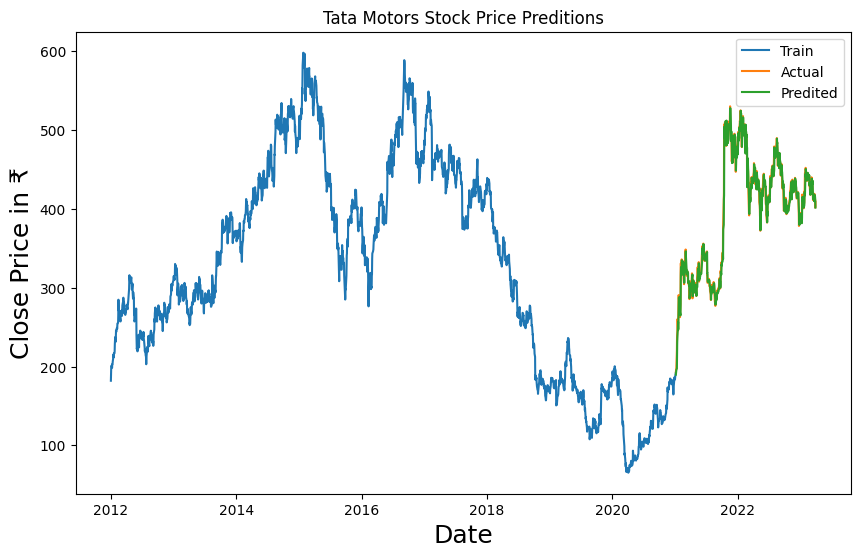

In [19]:
#Ploting the Graph for training data + Predicted data + Actual Data
plt.figure(figsize=(10,6))
plt.title("Tata Motors Stock Price Preditions")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price in ₹",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'pred']])
plt.legend(['Train','Actual','Predited'])
plt.show()